# META METHODS

### IMPORTS

In [5]:
import numpy as np    
import pandas 
import sklearn as sk  
import warnings
warnings.filterwarnings("ignore")

### CARGAR LOS DATOS

In [6]:
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
print(X.shape)
print(y.shape)

(7375, 1477)
(7375, 1)


### VOTING SCHEME

In [ ]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=5

clf1 = MultinomialNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

### HARD

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

Accuracy: 0.636 [Majority Voting]


### SOFT

In [6]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2.5,1.5,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.635 [Weighted Voting]


: 

### BAGGING

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

lb = []
for nest in [1,2,5,10,20]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2 = []
print()
for nest in [1,2,5,10,20]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=nest, max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())


Accuracy: 0.605 [1]
Accuracy: 0.599 [2]
Accuracy: 0.626 [5]
Accuracy: 0.629 [10]
Accuracy: 0.631 [20]

Accuracy: 0.578 [1]
Accuracy: 0.582 [2]
Accuracy: 0.613 [5]
Accuracy: 0.633 [10]
Accuracy: 0.655 [20]


### RANDOM FOREST

In [7]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.594 [1]
Accuracy: 0.611 [2]
Accuracy: 0.633 [5]
Accuracy: 0.638 [10]
Accuracy: 0.643 [20]


In [8]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.605 [1]
Accuracy: 0.602 [2]
Accuracy: 0.636 [5]
Accuracy: 0.640 [10]
Accuracy: 0.635 [20]


### BOOSTING

In [9]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.555 [1]
Accuracy: 0.549 [2]
Accuracy: 0.565 [5]
Accuracy: 0.604 [10]
Accuracy: 0.612 [20]


In [10]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.570 [1]
Accuracy: 0.600 [2]
Accuracy: 0.631 [5]
Accuracy: 0.636 [10]
Accuracy: 0.643 [20]


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.559 [1]
Accuracy: 0.562 [2]
Accuracy: 0.569 [5]
Accuracy: 0.595 [10]
Accuracy: 0.612 [20]


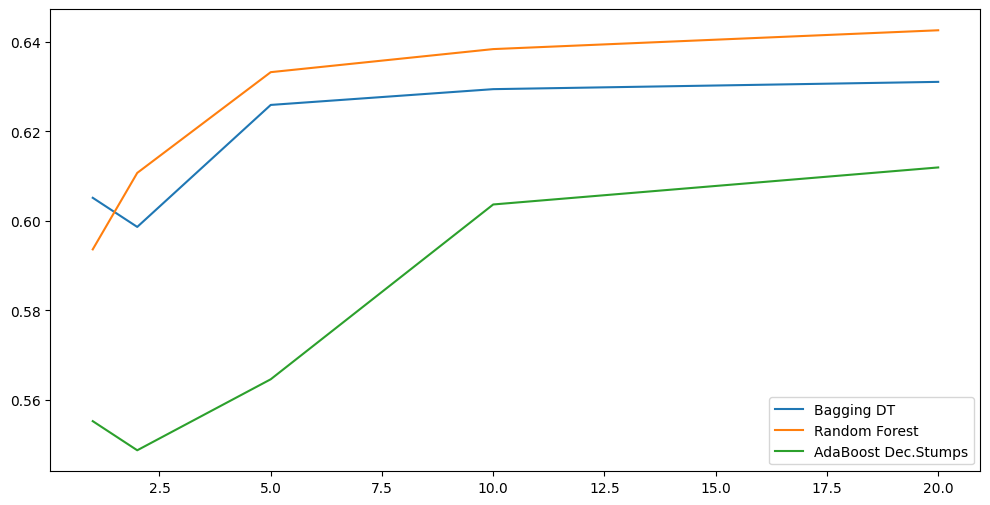

In [16]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20],lb,label="Bagging DT")
plt.plot([1,2,5,10,20],lrf,label="Random Forest")
plt.plot([1,2,5,10,20],lboo,label="AdaBoost Dec.Stumps")
plt.legend(loc='lower right')

plt.show()

In [4]:
# Reimportar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.proportion import proportion_confint


# Configuración de los parámetros para Random Forest
cv = 5  # Número de pliegues
n_estimators_list = [1, 2, 5, 10, 20]
confidence_intervals = []

# Cálculo del intervalo de confianza para cada número de estimadores
for nest in n_estimators_list:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    accuracy = scores.mean()
    ci_lower, ci_upper = proportion_confint(count=accuracy * len(y), nobs=len(y), alpha=0.05, method='normal')
    confidence_intervals.append((nest, accuracy, ci_lower, ci_upper))
    print(f"Estimators: {nest}, Accuracy: {accuracy:.3f}, 95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

confidence_intervals


Estimators: 1, Accuracy: 0.604, 95% CI: (0.592, 0.615)
Estimators: 2, Accuracy: 0.588, 95% CI: (0.577, 0.600)
Estimators: 5, Accuracy: 0.634, 95% CI: (0.623, 0.645)
Estimators: 10, Accuracy: 0.639, 95% CI: (0.628, 0.650)
Estimators: 20, Accuracy: 0.647, 95% CI: (0.636, 0.658)


[(1, np.float64(0.6036610169491525), 0.592497602730206, 0.614824431168099),
 (2, np.float64(0.5884745762711864), 0.5772432959607721, 0.5997058565816005),
 (5, np.float64(0.6343050847457627), 0.6233131121743852, 0.6452970573171403),
 (10, np.float64(0.6386440677966101), 0.6276801918165794, 0.6496079437766408),
 (20, np.float64(0.6470508474576271), 0.6361441728721854, 0.6579575220430688)]